This is a dataset taken from the mavenanalytics.io website. The dataset consist of fictitious transaction records for a fictitious company named Maven Roasters, which operates out of three different New York City locations. The dataset includes the transaction date, timestamp and location, along with product-level details. 

In this project, I assume the role of lead data analyst who has been tasked with the job of analyzing this dataset to answer the business questions of the owner of Maven Roasters. The tool that I am choosing to perform my analysis will be Python for this assignment. I will demonstrate how to load the raw dataset into a dataframe, how to clean the dataset if neccessary, how to manipulate and transform the dataset to create new columns, how to process the data to perform calculations on the neccessary columns, and lastly, how to create and build visuals for my findings.

Owners Business Questions:

1) How have Maven Roasters sales trended over time?
2) Which days of the week tend to be busiest, and why do you think that's the case?
3) Which products are sold most and least often?
4) Which products drive the msot revenue for the business?

Step 1:

Import the neccessary libraries that will be useful for analysis.

In [2]:
import numpy as np  # For numerical computation
import pandas as pd # For data manipulation and loading data
pd.set_option("display.max_rows", None) # To display all rows of data
pd.set_option("display.max_columns", None)  # To display all columns of data
import matplotlib.pyplot as plt # For visualizations
%matplotlib inline  
from matplotlib import style # To change the style of graphic
style.use("ggplot") # Setting the style of visuals
import seaborn as sns   # For advanced visualizations
sns.set_style("darkgrid")   # Setting the style of advanced visuals

Step 2:

Loading the dataset that the owner has given me to be analyzed into a pandas dataframe for easy readability.

In [3]:
coffee_shop = pd.read_excel(r"C:\Users\mjaso\Downloads\Coffee+Shop+Sales_Project\Coffee Shop Sales.xlsx")   # Loading an excel worksheet with the data into a pandas dataframe

Step 3:

Examining the data to get a better understanding of what the data consist of.

In [4]:
coffee_shop.head(3) # To get a quick view of the first three rows of data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg


In [5]:
coffee_shop.tail(3) # To get a quick view of the last three rows of data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [6]:
coffee_shop.describe() # To get statistical information on numerical columns from the dataset

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [7]:
coffee_shop.describe(include="object") # To get statistical information on categorical columns from the dataset

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [8]:
coffee_shop.info()  # To get a view of all the columns and the datatypes associated with those columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


Due to a time associated column not having the proper datatype, which would effect analysis, I am going to convert that column into the correct datatype.

In [9]:
coffee_shop["transaction_time"] = coffee_shop["transaction_time"].astype(str)   # Converting the transaction_time column into a string datatype


Converted the targeted column into a string, now can convert that column into a datetime datatype.

In [10]:
coffee_shop["transaction_time"] = pd.to_datetime(coffee_shop["transaction_time"])   # Converting the time column to datetime datatype

Verifying the change of datatypes.

In [11]:
coffee_shop.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [12]:
coffee_shop.describe(include="object")

,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116
unique,3,9,29,80
top,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,50735,58416,17183,3076


In [13]:

coffee_shop.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  datetime64[ns]
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


Now I have the time column in a datatype that we can utilize for useful analysis.

Converting the values in the time column to hours, adding a day of the week column, and month column. This will be beneficial for analysis later, as it will assist in answering some of the business questions.

Verifying the changes made in the transaction time column.

In [14]:
coffee_shop["transaction_time"] = coffee_shop["transaction_time"].dt.hour   # Converting the transaction_time column to the associated hour value


In [15]:
coffee_shop["day"] = coffee_shop["transaction_date"].dt.day_name()  # Creating a new day column with the day names associated with each value
coffee_shop["day"][:10]

0    Sunday
1    Sunday
2    Sunday
3    Sunday
4    Sunday
5    Sunday
6    Sunday
7    Sunday
8    Sunday
9    Sunday
Name: day, dtype: object

In [16]:
coffee_shop["month"] = coffee_shop["transaction_date"].dt.month # Creating a month column with the month number associated with each value
coffee_shop["month"][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: month, dtype: int64

Step 4:

Checking the dataset for any duplicate and null values.

In [19]:
duplicates = coffee_shop.duplicated().sum() # Created a variable for duplicate rows
print(f"This dataset has {duplicates} rows of duplicated data.")

This dataset has 0 rows of duplicated data.


In [20]:
for na in coffee_shop.columns:  # Utilizing a for loop to check for any null values in all of the columns of the dataset
    null = coffee_shop[na].isnull().sum()
    print(f"There are {null} null values in the column {na}.")  

There are 0 null values in the column transaction_id.
There are 0 null values in the column transaction_date.
There are 0 null values in the column transaction_time.
There are 0 null values in the column transaction_qty.
There are 0 null values in the column store_id.
There are 0 null values in the column store_location.
There are 0 null values in the column product_id.
There are 0 null values in the column unit_price.
There are 0 null values in the column product_category.
There are 0 null values in the column product_type.
There are 0 null values in the column product_detail.
There are 0 null values in the column day.
There are 0 null values in the column month.


Step 5:

Checking for unique values.

In [21]:
for dis in coffee_shop.columns: # Utilizing a for loop to check for the count of any unique values in the dataset
    uniq = coffee_shop[dis].nunique()
    print(f"There are {uniq} unique values in the column {dis}.")

There are 149116 unique values in the column transaction_id.
There are 181 unique values in the column transaction_date.
There are 15 unique values in the column transaction_time.
There are 6 unique values in the column transaction_qty.
There are 3 unique values in the column store_id.
There are 3 unique values in the column store_location.
There are 80 unique values in the column product_id.
There are 41 unique values in the column unit_price.
There are 9 unique values in the column product_category.
There are 29 unique values in the column product_type.
There are 80 unique values in the column product_detail.
There are 7 unique values in the column day.
There are 6 unique values in the column month.


Business Questions:

1) How have Maven Roasters sales trended over time?

###### Sales trended by month.

In [22]:
sales_month_trend = coffee_shop.groupby("month").agg(total_sales=("unit_price", "sum")).sort_values(by="total_sales")
sales_month_trend

,total_sales
month,
2,55134.34
1,59018.04
3,71833.08
4,85709.58
5,113076.91
6,119571.08


The month of Feburary produced the least amount of sales, while the month of June has produces the most amount of sales!


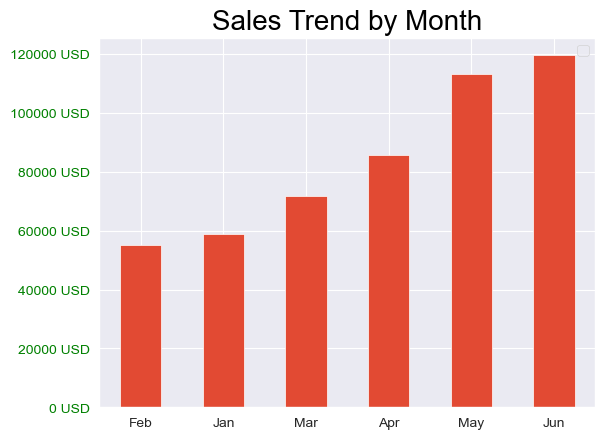

In [25]:
sales_month_trend.plot(kind="bar",
                       rot=0)
plt.title("Sales Trend by Month",
          color="black",
          fontsize=20)
plt.legend("")
plt.xticks([0,1,2,3,4,5],
           ["Feb","Jan","Mar","Apr","May","Jun"])
plt.xlabel("")
cash = list(range(0,140000,20000))
plt.yticks(cash, [f"{c} USD" for c in cash], 
           color="green")
print("The month of Feburary produced the least amount of sales, while the month of June has produces the most amount of sales!")

###### Sales by hour.

In [26]:
sales_hour_trend = coffee_shop.groupby("transaction_time").agg(total_sales=("unit_price", "sum"))
sales_hour_trend

,total_sales
transaction_time,
6,15304.42
7,46098.12
8,60801.87
9,61433.38
10,64857.99
11,32538.79
12,28467.09
13,29290.90
14,29513.24


The data indicates that between 8am and 10am hour is when the most sales occur, while the 6am and 8pm hours occur the least sells.


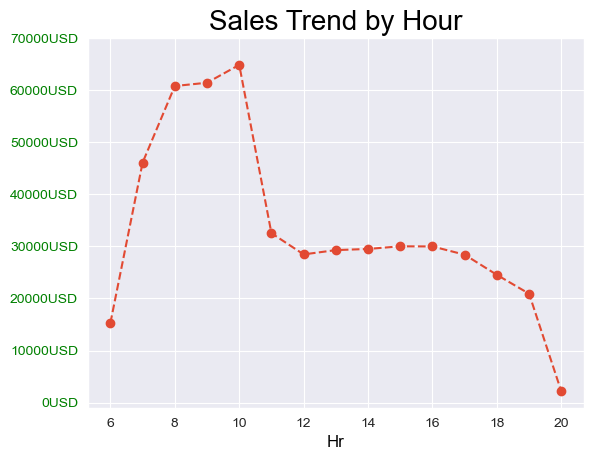

In [27]:
sales_hour_trend["total_sales"].plot(linestyle="--",
                                    marker="o",
                                    label="line with marker")
plt.title("Sales Trend by Hour",
          color="black",
          fontsize=20)
plt.xlabel("Hr", color="black")
sales = list(range(0,80000,10000))
plt.yticks(sales, [f"{s}USD" for s in sales], 
           color="green")
print("The data indicates that between 8am and 10am hour is when the most sales occur, while the 6am and 8pm hours occur the least sells.")

###### Sales by day.

In [28]:
sales_day_trend = coffee_shop.groupby("transaction_date").agg(total_sales=("unit_price", "sum"))
sales_day_trend[:10] # Displays total sales for every day


,total_sales
transaction_date,
2023-01-01,1731.80
2023-01-02,1743.95
2023-01-03,1826.60
2023-01-04,1533.40
2023-01-05,1715.35
2023-01-06,1580.15
2023-01-07,1921.60
2023-01-08,1938.23
2023-01-09,2077.81


According to the data, sales appear to be increasing by day on a monthly basis.


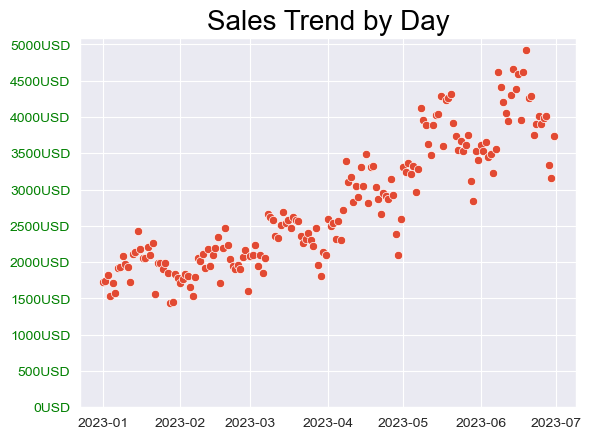

In [29]:
sns.scatterplot(data=sales_day_trend,
                x="transaction_date",
                y="total_sales")
plt.title("Sales Trend by Day",
          color="black",
          fontsize=20)
totals = list(range(0, 5500, 500))
plt.yticks(totals, [f"{t}USD" for t in totals],
           color="green")
plt.xlabel("")
plt.ylabel("")
print("According to the data, sales appear to be increasing by day on a monthly basis.")

2) Which days of the week tend to be the busiest, and why do you think thats the case?

In [30]:
busiest_days = coffee_shop.groupby("day").agg(num_of_customers=("transaction_id", "count")).sort_values(by="num_of_customers",ascending=False)
busiest_days

,num_of_customers
day,
Friday,21701
Thursday,21654
Monday,21643
Wednesday,21310
Tuesday,21202
Sunday,21096
Saturday,20510


The data indicates that the busiest days of the week are on Fridays, Thursdays and Mondays. The possible reasoning for this could be that 
      customers require more coffee towards the end of the week due to staying up later, and that customers require more coffee at the beginning 
      of the week due to staying up later during the weekend.


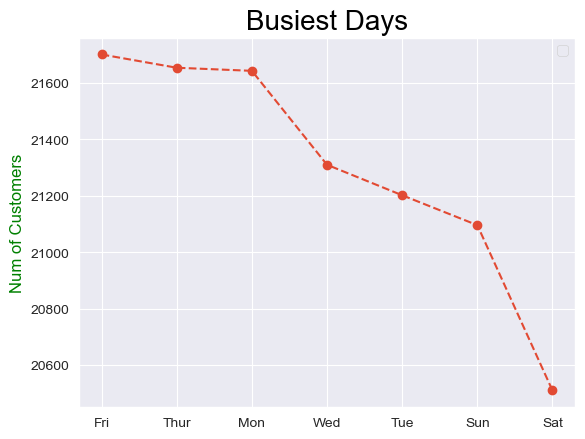

In [31]:
busiest_days.plot(linestyle="--",
                  marker="o",
                  label="line with marker")
plt.title("Busiest Days",
          fontsize=20,
          color="black")
plt.legend("")
plt.xticks([0,1,2,3,4,5,6],
           ["Fri","Thur","Mon","Wed","Tue","Sun","Sat"])
plt.xlabel("")
plt.ylabel("Num of Customers",
           color="green")
print("""The data indicates that the busiest days of the week are on Fridays, Thursdays and Mondays. The possible reasoning for this could be that 
      customers require more coffee towards the end of the week due to staying up later, and that customers require more coffee at the beginning 
      of the week due to staying up later during the weekend.""")

3) Which products are sold most and least often?

###### Top 10 Sold Products

In [32]:
most_sold_products = coffee_shop.groupby(["product_detail", "product_type", "product_category"]).agg(num_of_products=("product_id", "count")).sort_values(by="num_of_products", ascending=False)
most_sold_products[:10]

,,,num_of_products
product_detail,product_type,product_category,
Chocolate Croissant,Pastry,Bakery,3076
Earl Grey Rg,Brewed Black tea,Tea,3053
Dark chocolate Lg,Hot chocolate,Drinking Chocolate,3029
Morning Sunrise Chai Rg,Brewed Chai tea,Tea,3026
Columbian Medium Roast Rg,Gourmet brewed coffee,Coffee,3013
Latte,Barista Espresso,Coffee,2990
Sustainably Grown Organic Lg,Hot chocolate,Drinking Chocolate,2961
Traditional Blend Chai Rg,Brewed Chai tea,Tea,2955
Spicy Eye Opener Chai Lg,Brewed Chai tea,Tea,2951


###### Bottom 10 Sold Products

In [33]:
least_sold_products = coffee_shop.groupby(["product_detail", "product_type", "product_category"]).agg(num_of_products=("product_id", "count")).sort_values(by="num_of_products", ascending=True)
least_sold_products[:10]

,,,num_of_products
product_detail,product_type,product_category,
Dark chocolate,Drinking Chocolate,Packaged Chocolate,118
Spicy Eye Opener Chai,Chai tea,Loose Tea,122
Guatemalan Sustainably Grown,Green beans,Coffee beans,134
Earl Grey,Black tea,Loose Tea,142
Jamacian Coffee River,Premium Beans,Coffee beans,146
Chili Mayan,Drinking Chocolate,Packaged Chocolate,148
Columbian Medium Roast,Gourmet Beans,Coffee beans,148
Primo Espresso Roast,Espresso Beans,Coffee beans,150
Lemon Grass,Herbal tea,Loose Tea,152


4) Which product drives the most revenue for the business?

In [34]:
most_revenue = coffee_shop.groupby("product_category").agg(total_revenue=("unit_price", "sum")).sort_values(by="total_revenue", ascending=False)
most_revenue

,total_revenue
product_category,
Coffee,176629.30
Tea,128035.35
Bakery,80964.14
Drinking Chocolate,47578.75
Coffee beans,36845.25
Branded,13237.00
Loose Tea,11213.60
Flavours,5432.00
Packaged Chocolate,4407.64


There are four products whose total revenue does not generate over $25,000.


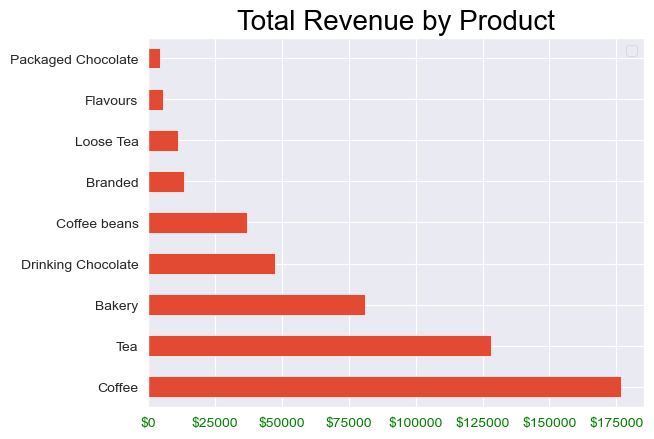

In [35]:
most_revenue.plot(kind="barh")
plt.title("Total Revenue by Product",
          color="black",
          fontsize=20)
plt.legend("")
plt.ylabel("")
rev = list(range(0,200000,25000))
plt.xticks(rev, [f"${r}" for r in rev], 
           color="green")
print("There are four products whose total revenue does not generate over $25,000.")

Recommendations:

I recommended that promotions take place during the first three months of the year. Total sales are quite lower than the months following and running some type of promotion may help increase sales. It may also help to run some type of promotion during the first hour of operation (6am). That hour generates the least amount of total sales. Between 8am and 10am total sales peak and then begin to slowly fall until closing. Fridays, Thrusdays, and Mondays are the busiest days of the week the organization. Once again, having some sort of promotion or sale during the other days of the week can help bring in more customers for those days. The organizations top selling product categories are the drinking chocolate, tea, and coffee. While the bottom selling product categories are packaged chocolate, loose tea, and coffee beans. Perhaps creating some new menu items with those product categories can bring in new sales, or the organization may think it's best to cut those products to limit financial loss. The products that are generating the most revenue are the coffee, tea, bakery, and drinking chocolate, while packaged chocolate, flavours and loose tea are generating the lowest profits. These are items that the organization could consider to take off the market to limit financial loss or either remarket those items. 